# Convolutional Neural Networks for Dogs and Cats

## Preparation (40 points total)
#### [10 points] Define and prepare your class variables. Use proper variable representations (int, float, one-hot, etc.). Use pre-processing methods (as needed) for dimensionality reduction, scaling, etc. Remove variables that are not needed/useful for the analysis. Describe the final dataset that is used for classification/regression (include a description of any newly formed variables you created).  

In [1]:
%%time
from PIL import Image
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

image_size = (50, 50)
total_image_size = image_size[0]**2
image_size3 = (1, 50, 50)
X = []
y = []
label = [0, 1] #cat == 0, dog == 1
for i in range(0, 12000):
    image = Image.open('train/cat.' + str(i) +'.jpg')
    image = image.resize(image_size)
    image = image.convert('L')
    image_array = np.array(image).reshape(total_image_size,)
    X.append(image_array)
    y.append(0)
    
for i in range(0, 12000):
    image = Image.open('train/dog.' + str(i) +'.jpg')
    image = image.resize(image_size)
    image = image.convert('L')
    image_array = np.array(image).reshape(total_image_size,)
    X.append(image_array)
    y.append(1)

X = np.asarray(X)
y = np.asarray(y)

Wall time: 51.5 s


In [2]:
print(X.shape)
print(y.shape)

X = X.astype(np.float32) / 255.0 # normalize

(24000, 2500)
(24000,)


#### [15 points] Choose and explain what metric(s) you will use to evaluate your algorithm’s performance. You should give a detailed argument for why this (these) metric(s) are appropriate on your data. That is, why is the metric appropriate for the task (e.g., in terms of the business case for the task). Please note: rarely is accuracy the best evaluation metric to use. Think deeply about an appropriate measure of performance.

#### [15 points] Choose the method you will use for dividing your data into training and testing (i.e., are you using Stratified 10-fold cross validation? Shuffle splits? Why?). Explain why your chosen method is appropriate or use more than one method as appropriate. Convince me that your cross validation method is a realistic mirroring of how an algorithm would be used in practice.

In [3]:
import keras
from keras.models import Sequential
from keras.layers import Reshape
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

y_ohe_train = keras.utils.to_categorical(y_train, 2)
y_ohe_test = keras.utils.to_categorical(y_test, 2)


Using TensorFlow backend.


## Modeling (50 points total)
#### [20 points] Create a convolutional neural network to use on your data using tensorflow. 

In [4]:
%%time
cnn2 = Sequential()
cnn2.add(Reshape(image_size3, input_shape=(1, total_image_size)))
cnn2.add(Conv2D(filters=16, kernel_size=(2, 2), padding='same'))
cnn2.add(Activation('relu'))
cnn2.add(MaxPooling2D(pool_size=(2, 2), data_format="channels_first"))


cnn2.add(Flatten())
cnn2.add(Dense(2))
cnn2.add(Activation('softmax'))

cnn2.compile(loss='mean_squared_logarithmic_error',
            optimizer='adam',
            metrics=['accuracy'])

cnn2.fit(np.expand_dims(X_train, axis=1), y_ohe_train, batch_size=32, epochs=50, shuffle=True, verbose=0)

Wall time: 2min 15s


In [5]:
from sklearn import metrics as mt
import seaborn as sns

In [6]:

yhat2 = np.argmax(cnn2.predict(np.expand_dims(X_test, axis=1)), axis=1)
print(yhat2.shape)
acc2 = mt.accuracy_score(y_test, yhat2)
acc2

(4800,)


0.67874999999999996

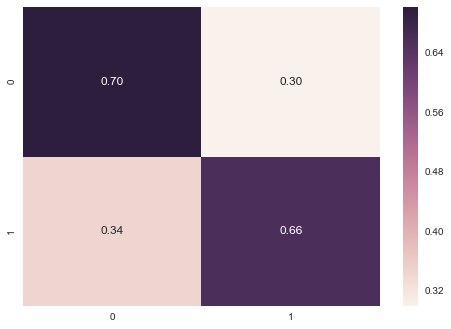

In [24]:
cnn2_conf = mt.confusion_matrix(y_test, yhat2)
cnn2_conf = cnn2_conf/np.sum(cnn2_conf,axis=1)[:,np.newaxis]

sns.heatmap(cnn2_conf, annot=True, fmt='.2f')

#### [20 points] Investigate at least two different deep network architectures. Use the method of cross validation and evaluation metric that you argued for at the beginning of the lab. Visualize the results of the CNNs. 

In [7]:
%%time
cnn_layers = []
cnn = Sequential()

cnn_layers.append(Reshape(image_size3, input_shape=(1,total_image_size)))
cnn_layers.append(Conv2D(filters=32, kernel_size=(2, 2), padding='same'))
cnn_layers.append(Activation('relu'))
cnn_layers.append(MaxPooling2D(pool_size=(2, 2), data_format="channels_first"))

cnn_layers.append(Conv2D(filters=64, kernel_size=(2, 2), padding='same'))
cnn_layers.append(Activation('relu'))
cnn_layers.append(Dropout(.10))
cnn_layers.append(Conv2D(filters=64, kernel_size=(3, 3), padding='same'))
cnn_layers.append(Activation('relu'))
cnn_layers.append(MaxPooling2D(pool_size=(2, 2),strides=2, data_format="channels_first"))

cnn_layers.append(Dropout(.25))
cnn_layers.append(Conv2D(filters=128, kernel_size=(3, 3), padding='same'))
cnn_layers.append(Activation('relu'))
cnn_layers.append(Dropout(.25))
cnn_layers.append(Conv2D(filters=256, kernel_size=(3, 3), padding='same'))
cnn_layers.append(Activation('relu'))
cnn_layers.append(MaxPooling2D(pool_size=(2, 2), data_format="channels_first"))


cnn_layers.append(Flatten())
cnn_layers.append(Dense(2))
cnn_layers.append(Activation('softmax'))
for x in cnn_layers:
    cnn.add(x)

cnn.compile(loss='mean_squared_logarithmic_error',
            optimizer='adam',
            metrics=['accuracy'])

cnn.fit(np.expand_dims(X_train, axis=1), y_ohe_train, batch_size=32, epochs=50, shuffle=True, verbose=1)

Epoch 1/50
19200/19200 [==============================] - 21s - loss: 0.1201 - acc: 0.5688    
Epoch 2/50
19200/19200 [==============================] - 21s - loss: 0.1164 - acc: 0.6019    
Epoch 3/50
19200/19200 [==============================] - 21s - loss: 0.1145 - acc: 0.6116    
Epoch 4/50
19200/19200 [==============================] - 21s - loss: 0.1133 - acc: 0.6194    
Epoch 5/50
19200/19200 [==============================] - 21s - loss: 0.1117 - acc: 0.6264    
Epoch 6/50
19200/19200 [==============================] - 21s - loss: 0.1110 - acc: 0.6296    
Epoch 7/50
19200/19200 [==============================] - 21s - loss: 0.1099 - acc: 0.6358    
Epoch 8/50
19200/19200 [==============================] - 21s - loss: 0.1092 - acc: 0.6439    
Epoch 9/50
19200/19200 [==============================] - 22s - loss: 0.1088 - acc: 0.6423    
Epoch 10/50
19200/19200 [==============================] - 21s - loss: 0.1078 - acc: 0.6497    
Epoch 11/50
19200/19200 [========================

In [8]:
yhat = np.argmax(cnn.predict(np.expand_dims(X_test, axis=1)), axis=1)
yhat_probs = cnn.predict_proba(np.expand_dims(X_test, axis=1))
acc = mt.accuracy_score(y_test, yhat)
acc

4768/4800 [============================>.] - ETA: 0s

0.68437499999999996

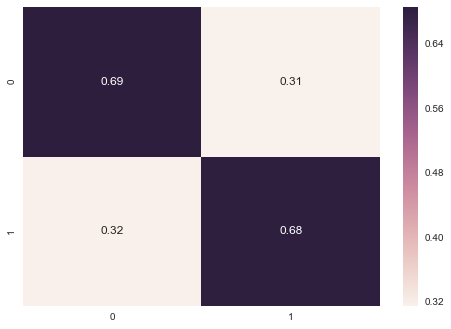

In [22]:
cnn_conf = mt.confusion_matrix(y_test, yhat)
cnn_conf = cnn_conf/np.sum(cnn_conf,axis=1)[:,np.newaxis]

sns.heatmap(cnn_conf, annot=True, fmt='.2f')


#### [10 points] Compare the performance of your convolutional network to a standard multi-layer perceptron (MLP) using the receiver operating characteristic and area under the curve.

In [9]:
mlp = Sequential()
mlp.add( Dense(input_dim=X_train.shape[1], units=30, activation='relu') )
mlp.add( Dense(units=15, activation='relu') )
mlp.add( Dense(2) )
mlp.add( Activation('softmax') )

mlp.compile(loss='mean_squared_error',
              optimizer='adam',
              metrics=['accuracy'])

mlp.fit(X_train, y_ohe_train, 
        batch_size=32, epochs=100, 
        shuffle=True, verbose=1)

In [10]:
yhat_mlp = np.argmax(mlp.predict(X_test), axis=1)
ypred_mlp = mlp.predict_proba(X_test)
acc_mlp = mt.accuracy_score(y_test,yhat_mlp)



cnn_fpr, cnn_tpr, cnn_thresholds = mt.roc_curve(y_test, yhat_probs[:,0], pos_label=0)
cnn_fpr1, cnn_tpr1, cnn_thresholds1 = mt.roc_curve(y_test, yhat_probs[:,1], pos_label=1)
cnn_auc_score = mt.auc(cnn_fpr, cnn_tpr)
cnn_auc_score1 = mt.auc(cnn_fpr1, cnn_tpr1)

mlp_fpr, mlp_tpr, mlp_thresholds = mt.roc_curve(y_test, ypred_mlp[:,0], pos_label=0)
mlp_fpr1, mlp_tpr1, mlp_thresholds1 = mt.roc_curve(y_test, ypred_mlp[:,1], pos_label=1)
mlp_auc_score = mt.auc(mlp_fpr, mlp_tpr)
mlp_auc_score1 = mt.auc(mlp_fpr1, mlp_tpr1)

3936/4800 [=======================>......] - ETA: 0s

In [ ]:
mlp_conf = mt.confusion_matrix(y_test, yhat)
mlp_conf = cnn2_conf/np.sum(cnn2_conf,axis=1)[:,np.newaxis]

sns.heatmap(cnn2_conf, annot=True, fmt='.2f')

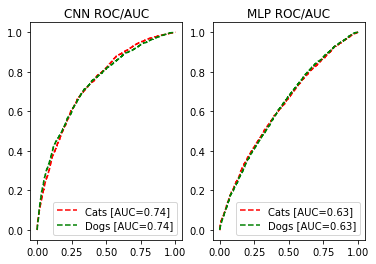

In [11]:
%matplotlib inline
plt.subplots(1, 2)
plt.subplot(121)
plt.title("CNN ROC/AUC")
plt.plot(cnn_fpr, cnn_tpr, '--r', label="Cats [AUC=%.2f]" % cnn_auc_score)
plt.legend(loc='best')
plt.plot(cnn_fpr1, cnn_tpr1, '--g', label="Dogs [AUC=%.2f]" % cnn_auc_score1)
plt.legend(loc='best')

plt.subplot(122)
plt.title("MLP ROC/AUC")
plt.plot(mlp_fpr, mlp_tpr, '--r', label="Cats [AUC=%.2f]" % mlp_auc_score)
plt.legend(loc='best')
plt.plot(mlp_fpr1, mlp_tpr1, '--g', label="Dogs [AUC=%.2f]" % mlp_auc_score1)
plt.legend(loc='best')

## Exceptional Work (10 points total)
#### One idea: Visualize the convolutional filters chosen by your CNN. Try to interpret some of their meanings.

In [25]:
filter_idx = [1, 5, 8, 12, 15]

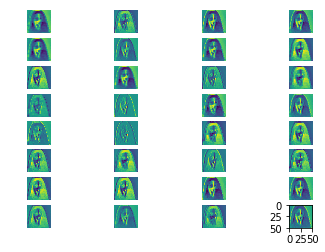

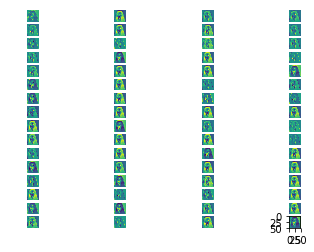

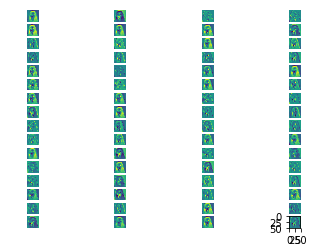

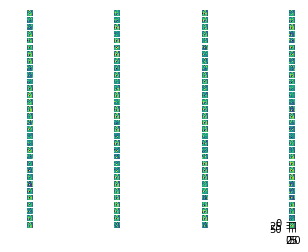

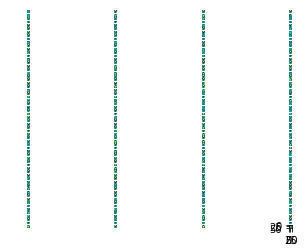

In [18]:
%matplotlib inline
rand_int = np.random.randint(0, 24000)
for x in filter_idx:
    weights = cnn_layers[x].get_weights()[0]
    num_filters = weights.shape[3]
    for i in range(0, num_filters):
#         plt.figure(figsize=(5, 5))
        kernel = weights[:, : ,0, i]
        kernel_reshaped = kernel.reshape(kernel.shape[0]**2)
        filtered = np.convolve(X[rand_int], kernel_reshaped, mode='same')
        plt.axis('off')
        plt.subplot(num_filters/4, 4, i+1)
        plt.imshow(filtered.reshape(image_size))
    plt.show()